<a href="https://colab.research.google.com/github/atheostheos/ML_2023/blob/main/10_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашние задания

## №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png

1. Прочитайте изображение из файла и выведите его на экран:

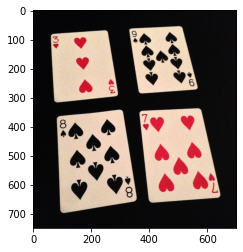

In [1]:
!wget http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png -O cards_plain.png

--2023-12-17 11:18:01--  http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png
Resolving farm4.staticflickr.com (farm4.staticflickr.com)... 108.156.94.80, 2600:9000:2351:7200:0:5a51:64c9:c681, 2600:9000:2351:7c00:0:5a51:64c9:c681, ...
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|108.156.94.80|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png [following]
--2023-12-17 11:18:01--  https://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png
Connecting to farm4.staticflickr.com (farm4.staticflickr.com)|108.156.94.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 865783 (845K) [image/png]
Saving to: ‘cards_plain.png’

cards_plain.png     100%[===================>] 845.49K  --.-KB/s    in 0.05s   

2023-12-17 11:18:01 (16.4 MB/s) - ‘cards_plain.png’ saved [865783/865783]



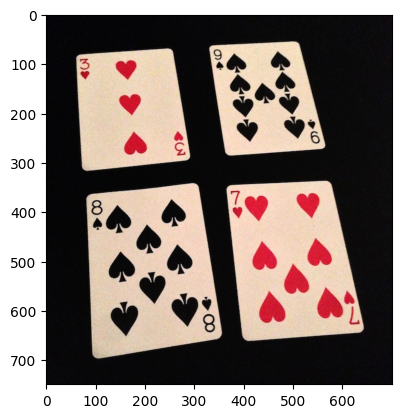

In [2]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

img = cv2.imread("cards_plain.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

2. Выполните последоватьельно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):

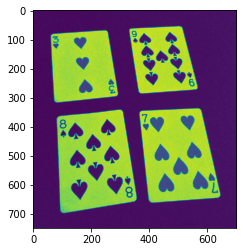

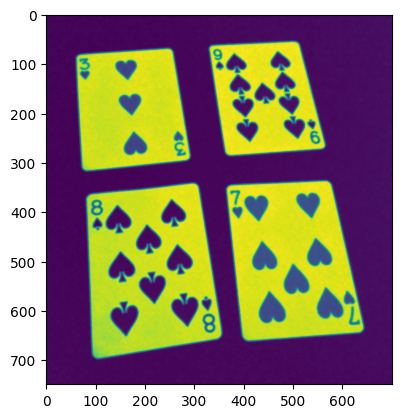

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(blur)
plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

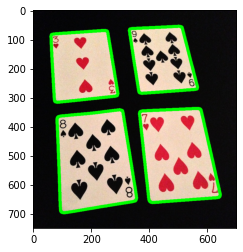

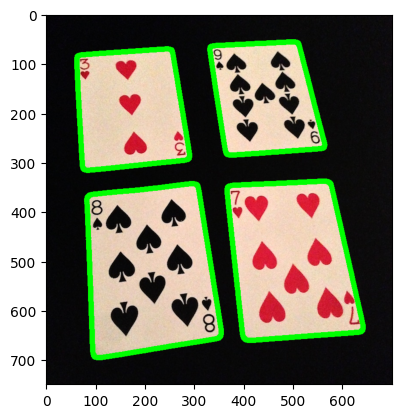

In [4]:
numcards = 4

flag, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]

contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.imshow(contours_img)
plt.show()

4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением:

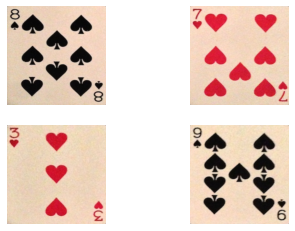

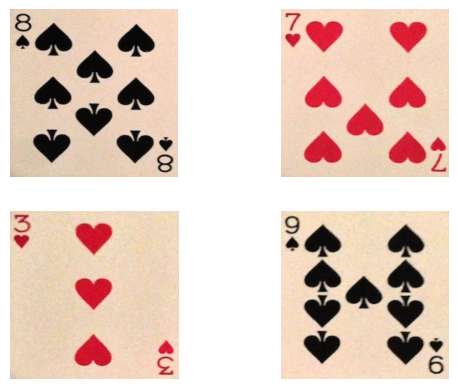

In [5]:
for i in range(numcards):
  card = contours[i]
  peri = cv2.arcLength(card,True)
  approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
  rect = cv2.minAreaRect(contours[2])
  r = cv2.boxPoints(rect)
  h = np.array([[0,0],[450,0],[450, 450],[0,450]], np.float32)
  transform = cv2.getPerspectiveTransform(approx,h)
  warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]
  plt.subplot(2,2,i+1); plt.axis('off')
  plt.imshow(warp)

plt.show()

5. Найдите количество символов на одной карте:
- на изображение карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

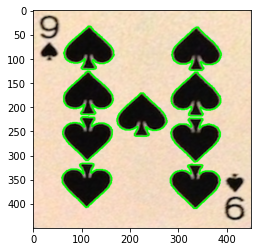

9


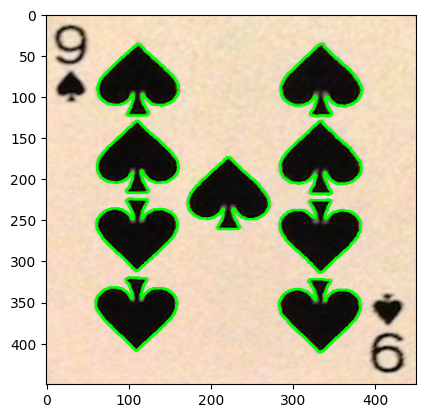

'9'

In [6]:
img_gray = cv2.cvtColor(warp,cv2.COLOR_RGB2GRAY)
contours_img = warp.copy()

flag, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour) > .9 * main_area :
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()

str(len(main_contours))

6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

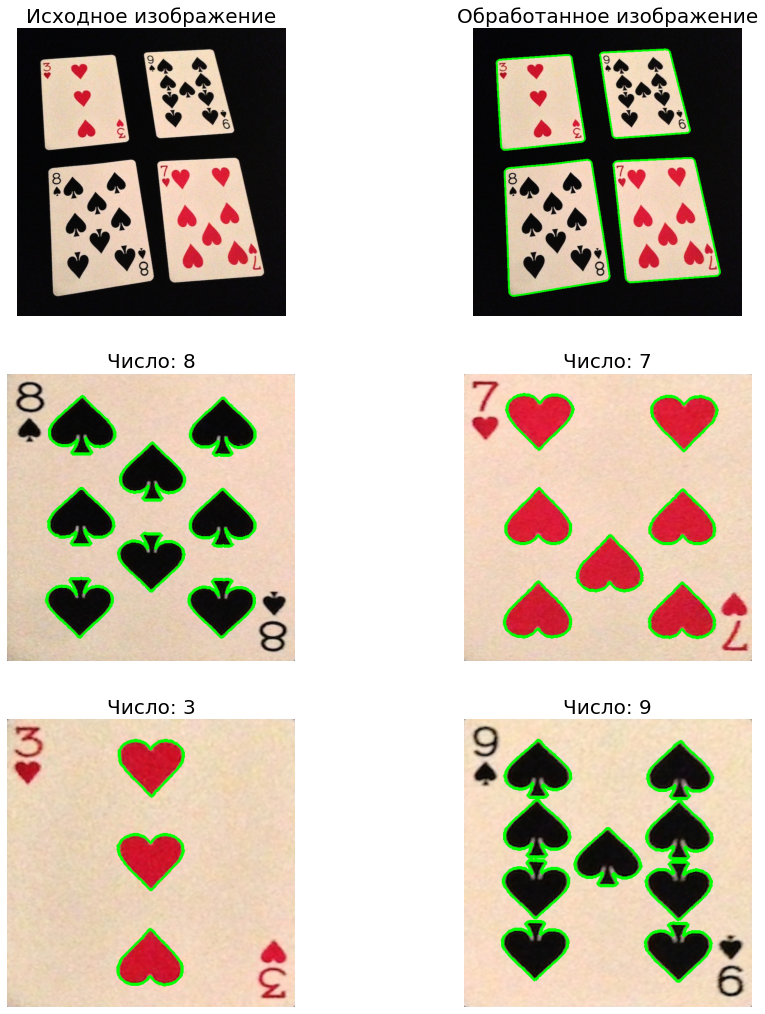

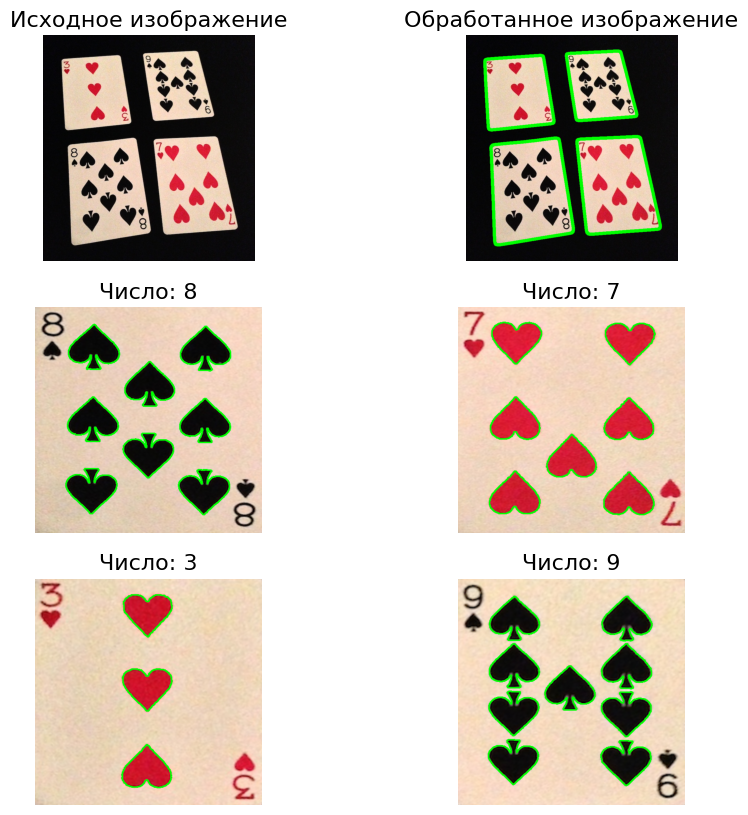

In [7]:
font_size = 16
plt.figure(figsize=(10, 10))

img = cv2.imread("cards_plain.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(3, 2, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

numcards = 4
flag, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]
contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.subplot(3, 2, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(contours_img)

def count_symbols(card: np.ndarray):
  img_gray = cv2.cvtColor(card,cv2.COLOR_RGB2GRAY)
  contours_img = card.copy()

  flag, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) > .9 * main_area :
        main_contours.append(contour)

  cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)

  return contours_img, len(main_contours)

for i in range(numcards):
  card = contours[i]
  peri = cv2.arcLength(card,True)
  approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
  rect = cv2.minAreaRect(contours[2])
  r = cv2.boxPoints(rect)
  h = np.array([[0,0],[450,0],[450, 450],[0,450]], np.float32)
  transform = cv2.getPerspectiveTransform(approx,h)
  warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]

  symbols_img, symbols_count = count_symbols(warp)
  plt.subplot(3, 2, i+3).set_title(f"Число: {symbols_count}", fontsize = font_size); plt.axis('off')
  plt.imshow(symbols_img)

## №2
Подумайте, что нужно изменить, чтобы код сработал для этого изображения:

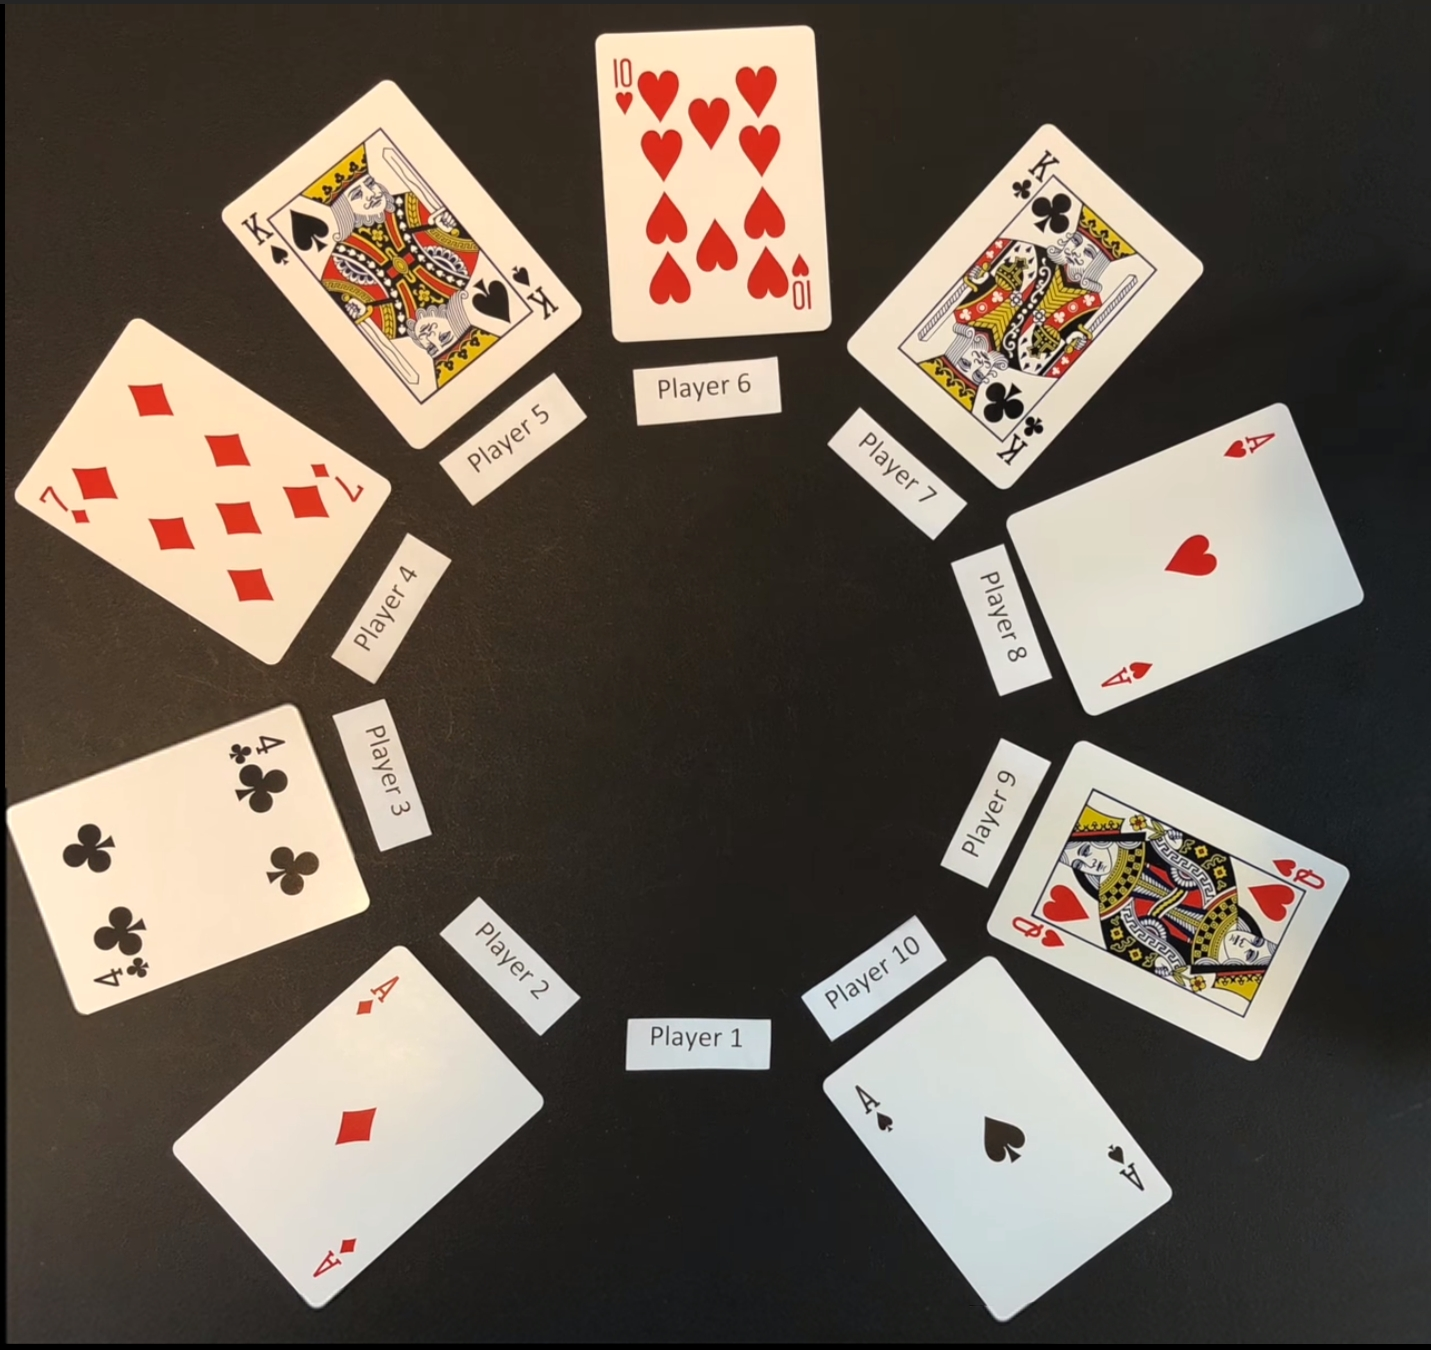

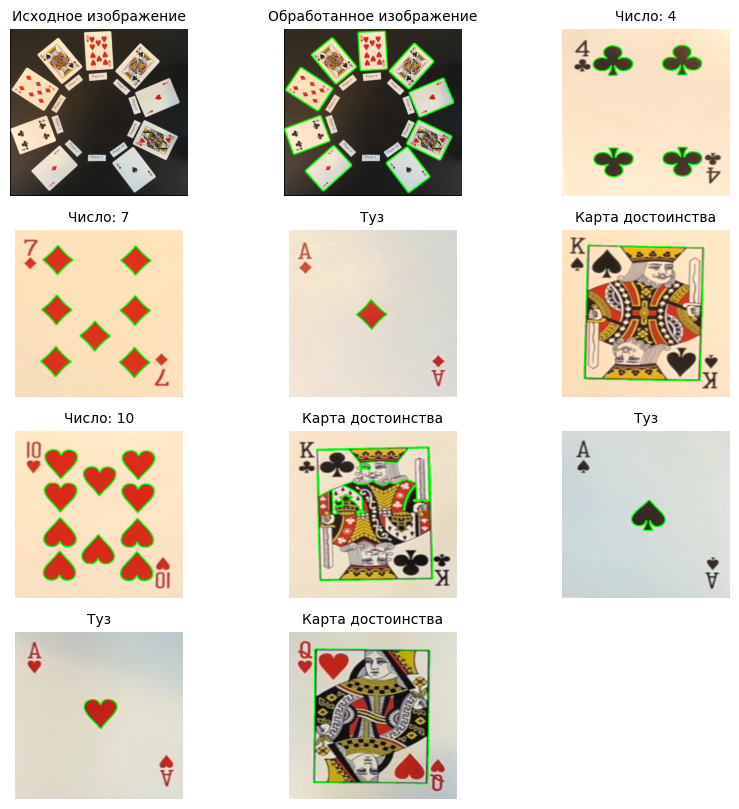

In [26]:
from scipy import ndimage

font_size = 10
plt.figure(figsize=(10, 10))

img = cv2.imread("cards_round.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(4, 3, 1).set_title('Исходное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

numcards = 9
flag, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:numcards]
contours_img = img.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.subplot(4, 3, 2).set_title('Обработанное изображение', fontsize = font_size); plt.axis('off')
plt.imshow(contours_img)

def count_symbols(card: np.ndarray):
  img_gray = cv2.cvtColor(card,cv2.COLOR_RGB2GRAY)
  contours_img = card.copy()

  flag, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*warp.shape[0]*warp.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) > .9 * main_area :
        main_contours.append(contour)

  contours_count = -1 if main_area > 0.3*warp.shape[0]*warp.shape[1] else len(main_contours)


  cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)

  return contours_img, contours_count

for i in range(numcards):
  card = contours[i]
  peri = cv2.arcLength(card,True)
  approx = np.array(cv2.approxPolyDP(card,0.02*peri,True), np.float32)
  rect = cv2.minAreaRect(card)
  r = cv2.boxPoints(rect)
  h = np.array([[0,0],[450,0],[450, 450],[0,450]], np.float32)
  transform = cv2.getPerspectiveTransform(approx,h)
  warp = cv2.warpPerspective(img,transform,(450,450))[:,::-1]

  symbols_img, symbols_count = count_symbols(warp)
  subplot = plt.subplot(4, 3, i+3)

  if symbols_count > 1:
    subplot.set_title(f"Число: {symbols_count}", fontsize = font_size)
  elif symbols_count == -1:
    subplot.set_title(f"Карта достоинства", fontsize = font_size)
  elif symbols_count == 1:
    subplot.set_title(f"Туз", fontsize = font_size)

  plt.axis('off')
  symbols_img = ndimage.rotate(symbols_img, 90) if rect[1][0] < rect[1][1] else symbols_img
  plt.imshow(symbols_img)